### Descriptive Statistics and Distribution

### 1. Setup & Daten Laden

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

In [3]:
# Einstellungen für saubere Plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# PFADE DEFINIEREN
current_dir = Path.cwd()
# Wir laden BEIDE Datensätze aus Notebook 1
snapshot_path = current_dir.parent / 'data' / 'oecd_snapshot_latest.csv'
timeseries_path = current_dir.parent / 'data' / 'oecd_full_time_series.csv'

df_snap = pd.read_csv(snapshot_path)
df_time = pd.read_csv(timeseries_path)

-> **Fokus "Feeling safe at night"**

In [4]:
target_measure = "Feeling safe at night"

# Filtern der Daten
data_analysis = df_snap[df_snap['measure'] == target_measure].copy()
data_time = df_time[df_time['measure'] == target_measure].copy()

print(f"Analyse-Set für '{target_measure}' erstellt.")
print(f"Anzahl Beobachtungen (Länder/Gruppen): {len(data_analysis)}")

Analyse-Set für 'Feeling safe at night' erstellt.
Anzahl Beobachtungen (Länder/Gruppen): 414


### 2. Verteilungsdiagnostik: Histogramm & KDE

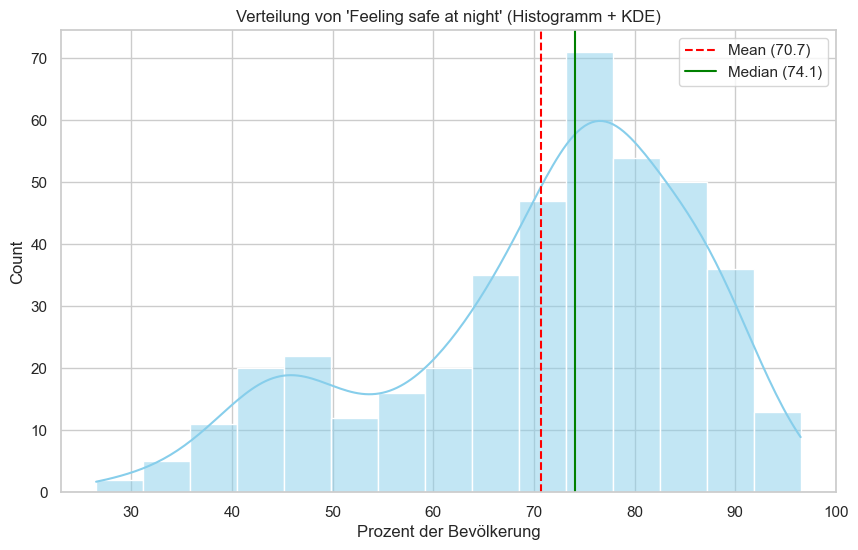

In [5]:
# Histogramm mit Kernel Density Estimate (KDE) Overlay
plt.figure(figsize=(10, 6))
sns.histplot(data=data_analysis, x="value", kde=True, bins=15, color="skyblue")

# Mittelwert und Median einzeichnen (Vergleich aus VL2)
mean_val = data_analysis['value'].mean()
median_val = data_analysis['value'].median()

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.1f})')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median ({median_val:.1f})')

plt.title(f"Verteilung von '{target_measure}' (Histogramm + KDE)")
plt.xlabel("Prozent der Bevölkerung")
plt.legend()
plt.show()

Wenn Mean ≈ Median: Symmetrische Verteilung (Hinweis auf Normalverteilung).

Wenn Mean < Median: Linksschief (Left-skewed).

Wenn Mean > Median: Rechtsschief (Right-skewed).

### Analyse der Verteilung (Histogramm & KDE)

Die Grafik zeigt die Verteilung des Sicherheitsgefühls ("Feeling safe at night")
* Die Kurve ist **nicht symmetrisch (glockenförmig)**, sondern zeigt eine klare Asymmetrie
* Der Gipfel (Modus) liegt weit rechts im hohen Prozentbereich
* Es gibt einen langen "Schwanz" (Tail) nach links zu den niedrigen Werten

**Statistische Deutung:**
* Da der **Median (74.1%)** größer ist als der **Mittelwert (70.7%)**, liegt eine **linksschiefe (left-skewed) Verteilung** vor

    => Die Mehrheit der OECD-Länder hat ein relativ hohes Sicherheitsgefühl, aber es gibt einige wenige Länder mit extrem niedrigen Werten, die den Durchschnitt (Mean) nach unten ziehen.

**Entscheidung für den weiteren Verlauf:**
Da die Daten *nicht* symmetrisch sind, ist der Mittelwert als Lagekennzahl verzerrt. Für spätere Gruppenvergleiche (z.B. "Sind reiche Länder sicherer?") sollten wir **robuste Verfahren** (wie den Median-Vergleich oder nicht-parametrische Tests) in Betracht ziehen, statt uns blind auf den Mittelwert zu verlassen.

### 3. Statistische Kennzahlen: Robust vs. Nicht-Robust

Wir berichten sowohl Mittelwert als auch Median. Sollten diese stark abweichen, stützen wir uns in der Interpretation auf den Median, da dieser laut VL2 robuster gegenüber Ausreißern ist.

In [6]:
# Berechnen der Kennzahlen
desc_stats = pd.DataFrame({
    'Kennzahl': ['Mittelwert (Mean)', 'Median', 'Standardabweichung (SD)', 'IQR (Interquartile Range)'],
    'Wert': [
        data_analysis['value'].mean(),
        data_analysis['value'].median(),
        data_analysis['value'].std(),
        data_analysis['value'].quantile(0.75) - data_analysis['value'].quantile(0.25)
    ],
    'Robustheit (VL2)': ['Nein (anfällig für Ausreisser)', 'Ja (Robust)', 'Nein', 'Ja']
})

print(desc_stats)

                    Kennzahl       Wert                Robustheit (VL2)
0          Mittelwert (Mean)  70.712780  Nein (anfällig für Ausreisser)
1                     Median  74.100000                     Ja (Robust)
2    Standardabweichung (SD)  15.065771                            Nein
3  IQR (Interquartile Range)  19.185716                              Ja


### Vergleich der Lagekennzahlen

**Ergebnis:**
* **Mittelwert:** 70.7%
* **Median:** 74.1%
* **Differenz:** ~3.4 Prozentpunkte

**Begründung der Methodenwahl:**
Laut **Vorlesung 2** ist der Mittelwert (Mean) nicht robust gegenüber Ausreißern und Schiefe. Da wir oben eine Linksschiefe festgestellt haben, ist der **Median** hier das "ehrlichere" Maß für die zentrale Tendenz eines "typischen" Landes. Er teilt die Verteilung genau in 50% sicherere und 50% unsicherere Länder, unbeeinflusst von den Extremfällen am unteren Ende.

Wir werden im Bericht primär den Median verwenden, den Mittelwert aber als Ergänzung berichten, um die Schiefe zu quantifizieren.

### 4. Ausreißer-Analyse mit Boxplots

Wir werden die Ausreißer nicht löschen, es sei denn, es sind Messfehler (z.B. Wert > 100%). Reale Extremwerte (z.B. sehr unsichere Länder) sind wichtige Informationen!

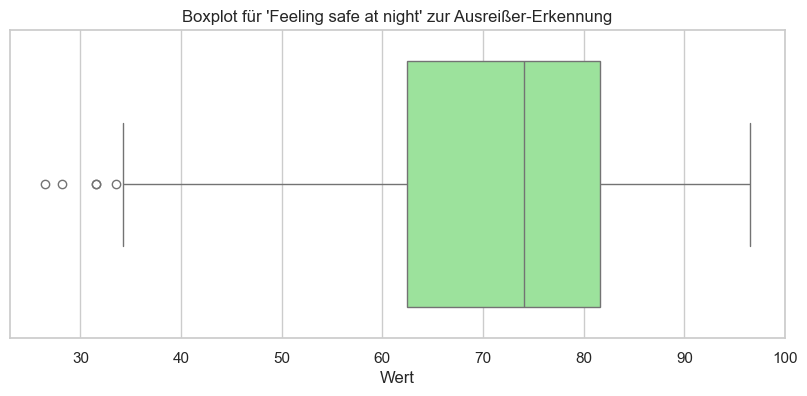

Gefundene Ausreißer (außerhalb 33.6 und 110.4):
      reference_area      value  year
9362    South Africa  31.500000  2024
10180          Chile  31.500000  2024
10351   South Africa  26.500000  2024
10574   South Africa  28.166667  2024
10695   South Africa  33.571429  2024


In [7]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data_analysis["value"], color="lightgreen")
plt.title(f"Boxplot für '{target_measure}' zur Ausreißer-Erkennung")
plt.xlabel("Wert")
plt.show()

# Identifikation der Ausreißer (Rechnerisch nach VL3)
Q1 = data_analysis['value'].quantile(0.25)
Q3 = data_analysis['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_analysis[(data_analysis['value'] < lower_bound) | (data_analysis['value'] > upper_bound)]

if len(outliers) > 0:
    print(f"Gefundene Ausreißer (außerhalb {lower_bound:.1f} und {upper_bound:.1f}):")
    # Wir zeigen Land und Wert an
    print(outliers[['reference_area', 'value', 'year']])
else:
    print("Keine statistischen Ausreißer nach Tukey-Methode gefunden.")

### Ausreißer-Analyse (Tukey Fences)

Der Boxplot und die Berechnung nach der **Tukey-Methode (1.5 * IQR)** identifizieren folgende Ausreißer am unteren Ende:
* **Länder:** South Africa (mehrfach), Chile.
* **Werte:** Zwischen 26.5% und 33.6%.

**Data Cleaning:**
Sind das Messfehler oder echte Daten?
1.  Die Werte liegen im möglichen Bereich (0-100%), sind also technisch keine Messfehler.
2.  Inhaltlich ist bekannt, dass Südafrika und Chile Herausforderungen mit Kriminalität haben. Die niedrigen Werte sind also **plausibel**.

=> Wir **behalten** diese Ausreißer im Datensatz.
* Das Entfernen würde die Realität verzerren ("Bias"). Wir wollen ja gerade untersuchen, wie sich das Sicherheitsgefühl unterscheidet. Würden wir die unsicheren Länder löschen, wäre unsere Analyse der "Sicherheit" nutzlos.
* Da wir Ausreißer haben, **müssen** wir für Hypothesentests (in Notebook 4) nicht-parametrische Tests (wie **Mann-Whitney U** oder **Spearman-Korrelation**) verwenden, da diese auf Rängen basieren und nicht durch Extremwerte verzerrt werden.

### 5. Normalverteilungs-Check: QQ-Plot

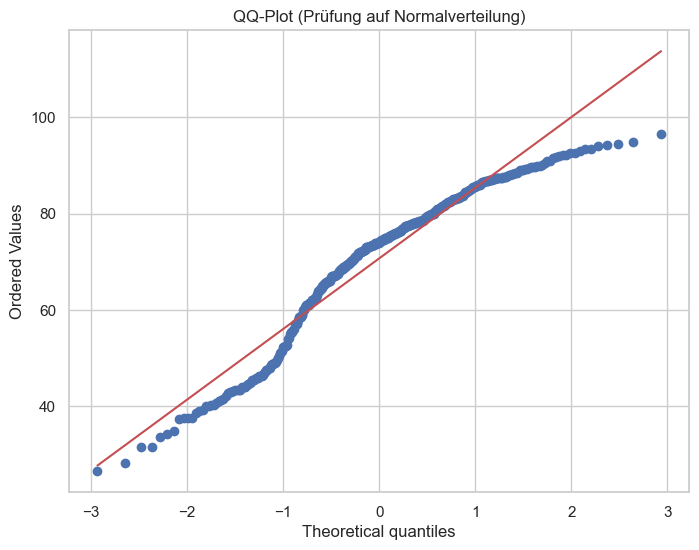

In [8]:
plt.figure(figsize=(8, 6))
stats.probplot(data_analysis['value'], dist="norm", plot=plt)
plt.title("QQ-Plot (Prüfung auf Normalverteilung)")
plt.show()

### Prüfung auf Normalverteilung (QQ-Plot)

Im Quantile-Quantile-Plot (QQ-Plot) vergleichen wir unsere Daten (blaue Punkte) mit einer theoretischen Normalverteilung (rote Linie).
* Im mittleren Bereich liegen die Punkte nah an der Linie.
* **Aber:** Am unteren Ende (links unten) weichen die Punkte massiv von der Linie ab (sie krümmen sich nach unten weg). Dies bestätigt die "Heavy Tails" der Linksschiefe, die wir schon im Histogramm gesehen haben.

**Finale Entscheidung für Notebook 4 (Hypothesentests):**
Die Annahme der Normalverteilung ist **verletzt**.
Ein klassischer t-Test oder eine ANOVA (die Normalverteilung voraussetzen) wären hier statistisch unsauber und könnten zu falschen p-Werten führen.

=> Wir werden in den folgenden Notebooks **nicht-parametrische Tests** anwenden:
* Statt Pearson-Korrelation -> **Spearman-Rangkorrelation** (Notebook 3).
* Statt t-Test -> **Mann-Whitney-U Test** (Notebook 4).
* Statt ANOVA -> **Kruskal-Wallis Test** (Notebook 4).

Damit folgen wir der logischen Kette: *Datenverteilung bestimmt die Testwahl*.

### 6. Zeitverlauf (Explorativ)

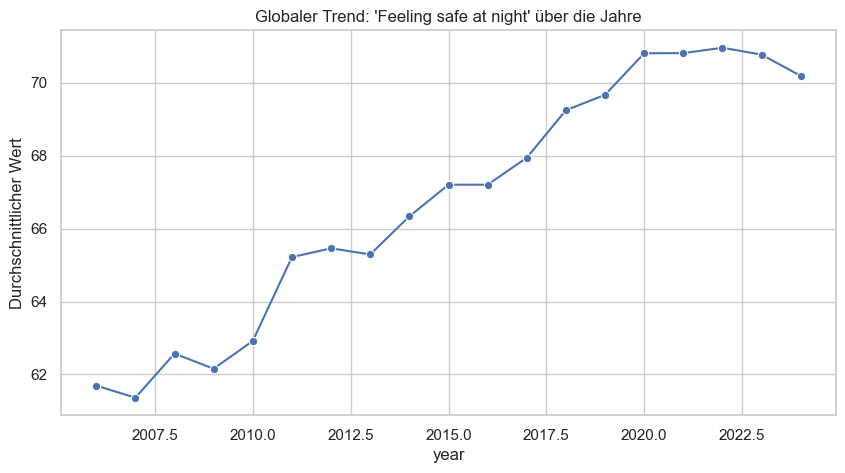

In [9]:
# Wir gruppieren nach Jahr und nehmen den Durchschnitt aller Länder, um den globalen Trend zu sehen.
trend = data_time.groupby('year')['value'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=trend, x='year', y='value', marker='o')
plt.title(f"Globaler Trend: '{target_measure}' über die Jahre")
plt.ylabel("Durchschnittlicher Wert")
plt.show()

### Zeitlicher Trend (Explorativ)

Der Linienplot über alle Jahre (basierend auf `df_time`) zeigt, dass der durchschnittliche Wert deutlich gestiegen ist. 

=> Diese Grafik dient nur der Einordnung des Kontextes. Für die statistischen Tests in den nächsten Notebooks bleiben wir jedoch strikt bei `df_snap` (nur ein Jahr pro Land), um die statistische Unabhängigkeit der Beobachtungen nicht zu verletzen (Vermeidung von Pseudoreplikation).